# Importing the required libraries and dataset

In [107]:
import pandas as pd 

In [108]:
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

In [110]:
df = pd.read_csv(r"C:\Users\vorte\Downloads\Portfolio Projects\Python Project\college_data.csv")

# Data Cleaning & Manipulation

In [111]:
df.columns

Index(['UNITID', 'INSTNM', 'ADM_RATE_ALL', 'CITY', 'STABBR', 'ZIP', 'REGION',
       'PREDDEG', 'LOCALE', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF',
       'CCSIZSET', 'PPTUG_EF', 'SAT_AVG_ALL', 'COSTT4_A', 'CONTROL',
       'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'MEDIAN_HH_INC',
       'MN_EARN_WNE_INDEP0_P10', 'MN_EARN_WNE_INDEP1_P10', 'UGDS_WHITE',
       'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
       'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN', 'year'],
      dtype='object')

In [112]:
# Deleting columns which are not required for the analysis 
df.drop(columns=['ZIP', 'PREDDEG', 'LOCALE', 'LATITUDE', 'LONGITUDE', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_UNKN', 'MN_EARN_WNE_INDEP1_P10', 'COSTT4_A', 'CCBASIC', 'CCSIZSET',
                 'MEDIAN_HH_INC', 'MN_EARN_WNE_INDEP0_P10', 'CCUGPROF','REGION'], inplace=True)
df.columns

Index(['UNITID', 'INSTNM', 'ADM_RATE_ALL', 'CITY', 'STABBR', 'PPTUG_EF',
       'SAT_AVG_ALL', 'CONTROL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'UGDS_NRA',
       'year'],
      dtype='object')

In [113]:
# Renaming the columns for ease-of-use 
df.rename(columns={'UNITID':'University_ID', 'INSTNM':'University_Name', 'CITY':'City', 'STABBR':'State_Name',
                       'ADM_RATE_ALL':'Acceptance_Rate', 'PPTUG_EF':'Part-Time_Students','SAT_AVG_ALL':'Average_SAT_Score',
                       'CONTROL':'University_Type','TUITIONFEE_IN':'In-State_Tuition_Fees', 'TUITIONFEE_OUT':'Out-of-State_Tuition_Fees',
                       'UGDS_NRA':'International_Students', 'year':'Year'},inplace= True)
df.columns 

Index(['University_ID', 'University_Name', 'Acceptance_Rate', 'City',
       'State_Name', 'Part-Time_Students', 'Average_SAT_Score',
       'University_Type', 'In-State_Tuition_Fees', 'Out-of-State_Tuition_Fees',
       'International_Students', 'Year'],
      dtype='object')

In [114]:
# Extracting unique values from the 'State_Name' column of the DataFrame
df_unique = df['State_Name'].unique()
print(df_unique)

['AL' 'AK' 'AZ' 'AR' 'TN' 'CA' 'CO' 'CT' 'NY' 'DE' 'DC' 'FL' 'GA' 'MI'
 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'MO' 'KY' 'LA' 'ME' 'MD' 'MA' 'MN' 'MS'
 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC'
 'SD' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'PR' 'FM' 'VI' 'MH' 'GU']


In [115]:
# Dictionary mapping state abbreviations to full state names
state_abbr_to_full = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'TN': 'Tennessee', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut',
    'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida', 'MI': 'Michigan',
    'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KS': 'Kansas', 'MO': 'Missouri', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'PR': 'Puerto Rico', 'FM': 'Federated States of Micronesia',
    'VI': 'Virgin Islands', 'MH': 'Marshall Islands', 'GU': 'Guam'
}

# Replacing state abbreviations with full state names
df['State_Name'] = df['State_Name'].replace(state_abbr_to_full)

# Check the result
print(df['State_Name'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'Tennessee' 'California'
 'Colorado' 'Connecticut' 'New York' 'Delaware' 'District of Columbia'
 'Florida' 'Georgia' 'Michigan' 'Hawaii' 'Idaho' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Missouri' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Minnesota' 'Mississippi' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico'
 'Federated States of Micronesia' 'Virgin Islands' 'Marshall Islands'
 'Guam']


In [116]:
# This transformation makes the variables more intuitive and easier to interpret
df['Acceptance_Rate'] = df['Acceptance_Rate'] * 100
df['Part-Time_Students'] = df['Part-Time_Students'] * 100
df['International_Students'] = df['International_Students'] * 100

In [117]:
# Defining a function to map acceptance rate to selectivity level
def get_selectivity_level(acceptance_rate):
    if acceptance_rate <= 10:
        return 'Extremely Selective'
    elif 10 < acceptance_rate <= 20:
        return 'Highly Selective'
    elif 20 < acceptance_rate <= 50:  
        return 'Moderately Selective'
    elif 50 < acceptance_rate <= 75:  
        return 'Not Selective'
    else:
        return 'Inclusive'

# Creating a new column 'Selectivity_Level' based on the 'Acceptance_Rate' column
df['Selectivity_Level'] = df['Acceptance_Rate'].apply(get_selectivity_level)
df['Selectivity_Level'].unique()

array(['Inclusive', 'Not Selective', 'Moderately Selective',
       'Highly Selective', 'Extremely Selective'], dtype=object)

In [118]:
# Remove rows with null values
df.dropna(inplace=True)

# Confirming that null values have been removed
null_values_after_drop = df.isnull().sum()
print("Null values after dropping:", null_values_after_drop)

Null values after dropping: University_ID                0
University_Name              0
Acceptance_Rate              0
City                         0
State_Name                   0
Part-Time_Students           0
Average_SAT_Score            0
University_Type              0
In-State_Tuition_Fees        0
Out-of-State_Tuition_Fees    0
International_Students       0
Year                         0
Selectivity_Level            0
dtype: int64


In [119]:
# Converting 'In-State_Tuition_Fees' and 'Out-of_State_Tuition_Fees' columns to int data type
df['In-State_Tuition_Fees'] = df['In-State_Tuition_Fees'].astype(int)
df['Out-of-State_Tuition_Fees'] = df['Out-of-State_Tuition_Fees'].astype(int)
print(df.dtypes)

University_ID                  int64
University_Name               object
Acceptance_Rate              float64
City                          object
State_Name                    object
Part-Time_Students           float64
Average_SAT_Score            float64
University_Type               object
In-State_Tuition_Fees          int32
Out-of-State_Tuition_Fees      int32
International_Students       float64
Year                           int64
Selectivity_Level             object
dtype: object


In [120]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [121]:
# Filtering the DataFrame to include only data from the year 2022 allows us to focus our analysis on the most recent trends and patterns
df = df[df['Year'] == 2022]

# Data Analysis

In [122]:
print(df)

       University_ID                                    University_Name  \
21            100654                           Alabama A & M University   
43            100663                University of Alabama at Birmingham   
67            100706                University of Alabama in Huntsville   
108           100751                          The University of Alabama   
129           100830                    Auburn University at Montgomery   
...              ...                                                ...   
42033         488679      Indiana Wesleyan University-National & Global   
42094         490805                        Purdue University Northwest   
42140         492801  Drury University-College of Continuing Profess...   
42186         495767                  The Pennsylvania State University   
42191         497037  Abilene Christian University-Undergraduate Online   

       Acceptance_Rate             City    State_Name  Part-Time_Students  \
21           71.600610

c:\Users\vorte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


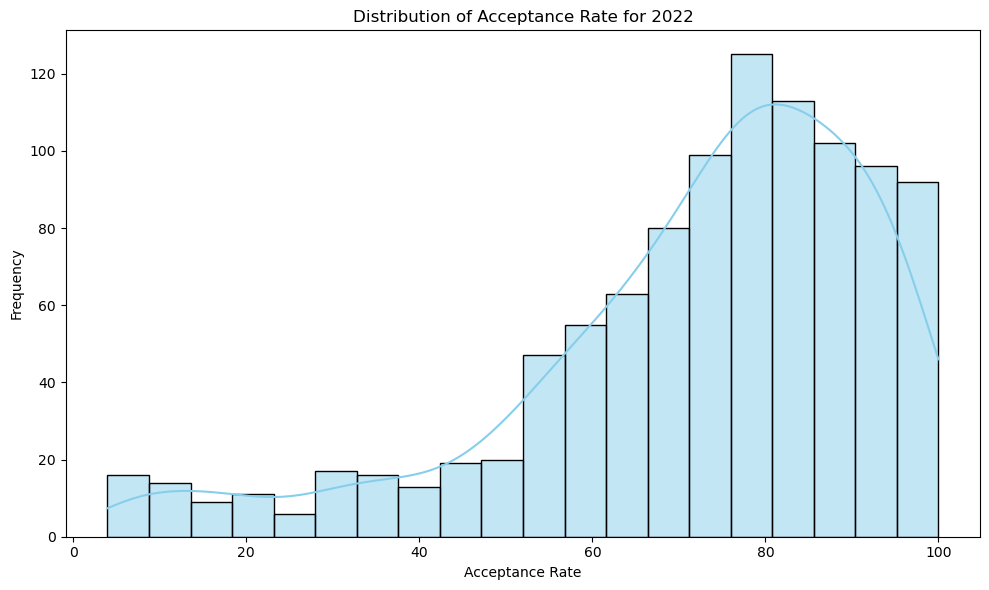

In [123]:
# Plotting the distribution of acceptance rates for 2022 with trend line
plt.figure(figsize=(10, 6))
sns.histplot(df['Acceptance_Rate'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Acceptance Rate for 2022')
plt.xlabel('Acceptance Rate')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

c:\Users\vorte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


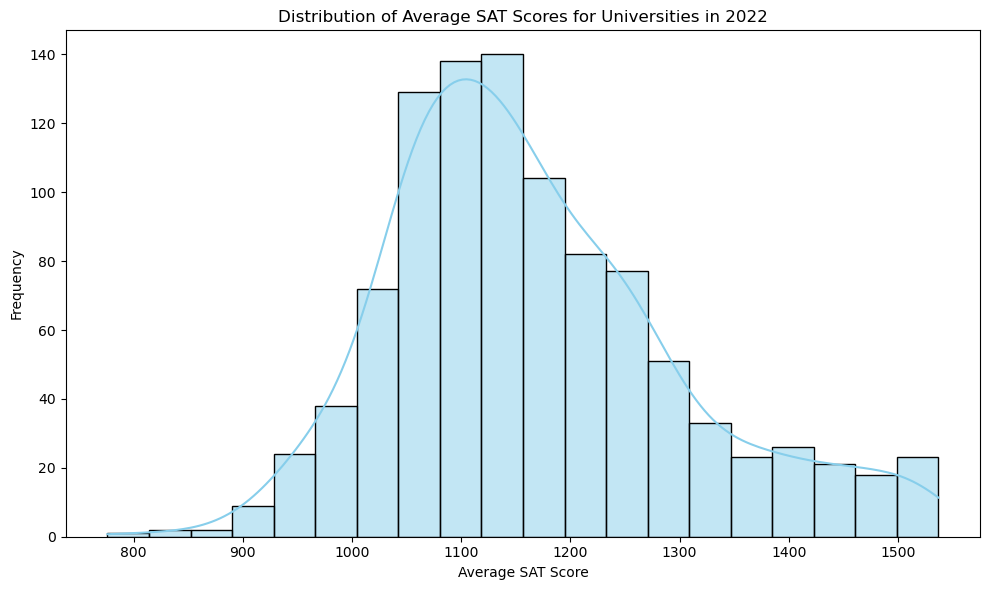

In [124]:
# Plotting the distribution of average SAT scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_SAT_Score'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Average SAT Scores for Universities in 2022')
plt.xlabel('Average SAT Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [125]:
# Sort the dataset by acceptance rate in ascending order
df_sorted = df.sort_values(by='Acceptance_Rate')

# Get the top 10 universities with the lowest acceptance rates, including only 'name' and 'acceptance_rate' columns
top_10_universities = df_sorted.head(15)[['University_Name', 'Acceptance_Rate','Average_SAT_Score']]

# Print the top 10 universities with the lowest acceptance rates
print(top_10_universities)

                                   University_Name  Acceptance_Rate  \
37897                          Stanford University         3.948009   
14240                           Harvard University         4.011352   
20924  Columbia University in the City of New York         4.130257   
19997                         Princeton University         4.380203   
4781                               Yale University         5.311177   
30632                             Brown University         5.514516   
29717                   University of Pennsylvania         5.865228   
24207                              Duke University         5.888981   
19244                            Dartmouth College         6.171533   
7844                         University of Chicago         6.478117   
3131                                Pomona College         6.635112   
8682                       Northwestern University         6.971618   
32817                        Vanderbilt University         7.142857   
30227 

In [126]:
# Sort the dataset by international students count in descending order and select top 10 universities
top_10_international = df.nlargest(10, 'International_Students')

# Calculate the difference between out-of-state tuition and in-state tuition
top_10_international['Tuition_Difference'] = top_10_international['Out-of-State_Tuition_Fees'] - top_10_international['In-State_Tuition_Fees']

# Display the top 10 universities with the highest international students and their tuition difference
print(top_10_international[['University_Name', 'International_Students', 'In-State_Tuition_Fees', 'Out-of-State_Tuition_Fees', 'Tuition_Difference']])

                                     University_Name  International_Students  \
3585   Southern California Institute of Architecture                   59.13   
23822                          School of Visual Arts                   52.97   
38856                     Soka University of America                   48.51   
34445                Brigham Young University-Hawaii                   38.83   
30769                  Rhode Island School of Design                   32.78   
22538                           Pratt Institute-Main                   31.66   
17992                        Missouri Valley College                   31.10   
22407                            Alliance University                   29.64   
2940                  Otis College of Art and Design                   29.47   
1231                        University of the Ozarks                   29.03   

       In-State_Tuition_Fees  Out-of-State_Tuition_Fees  Tuition_Difference  
3585                   49016             

In [127]:
# Calculate the mean acceptance rate for each state
state_acceptance_rates = df.groupby('State_Name')['Acceptance_Rate'].mean()

# Find the state with the highest acceptance rate
highest_acceptance_rate_state = state_acceptance_rates.idxmax()
highest_acceptance_rate = state_acceptance_rates.max()

# Find the state with the lowest acceptance rate
lowest_acceptance_rate_state = state_acceptance_rates.idxmin()
lowest_acceptance_rate = state_acceptance_rates.min()

# Print the results
print("State with the highest acceptance rate: $" + str(highest_acceptance_rate))
print("State with the lowest acceptance rate: $" + str(lowest_acceptance_rate))

State with the highest acceptance rate: $98.4126984
State with the lowest acceptance rate: $44.54531342


In [128]:
# Calculate the average in-state and out-of-state tuition fees 
average_instate_tuition = round(df['In-State_Tuition_Fees'].mean())
average_outstate_tuition = round(df['Out-of-State_Tuition_Fees'].mean())
print("Average in-state tuition fee for universities in 2022: $" + str(average_instate_tuition))
print("Average out-of-state tuition fee for universities in 2022: $" + str(average_outstate_tuition))

Average in-state tuition fee for universities in 2022: $26767
Average out-of-state tuition fee for universities in 2022: $31133


In [129]:
# Separate in-state and out-of-state tuition fees
in_state_tuition = df['In-State_Tuition_Fees']
out_of_state_tuition = df['Out-of-State_Tuition_Fees']

# Calculate highest and lowest in-state tuition fees
max_in_state = in_state_tuition.max()
min_in_state = in_state_tuition.min()

# Calculate highest and lowest out-of-state tuition fees
max_out_of_state = out_of_state_tuition.max()
min_out_of_state = out_of_state_tuition.min()

print("Highest In-State Tuition: $" + str(max_in_state))
print("Lowest In-State Tuition: $" + str(min_in_state))
print("Highest Out-of-State Tuition: $" + str(max_out_of_state))
print("Lowest Out-of-State Tuition: $" + str(min_out_of_state))

Highest In-State Tuition: $66064
Lowest In-State Tuition: $780
Highest Out-of-State Tuition: $66064
Lowest Out-of-State Tuition: $780


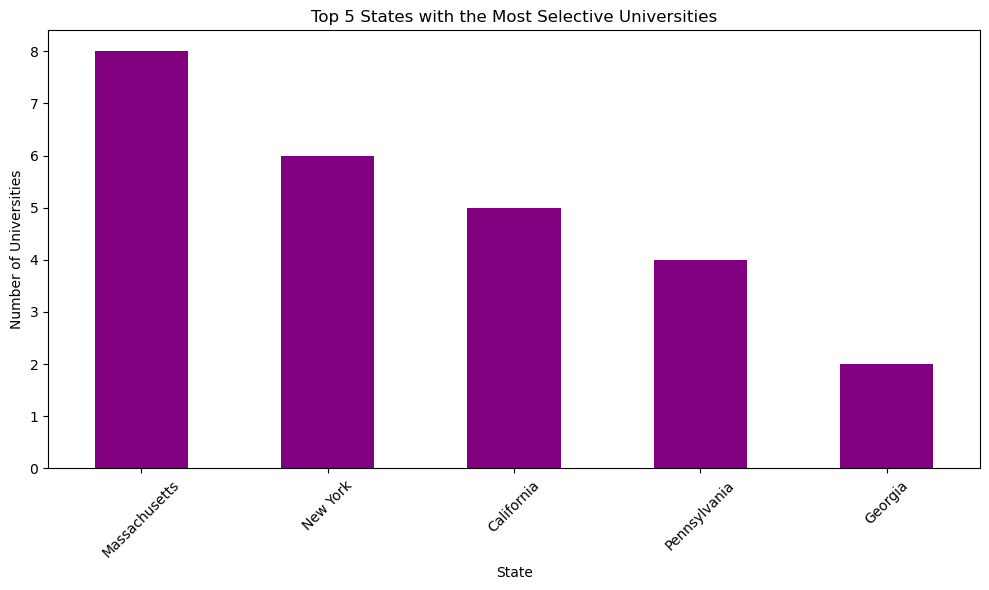

In [130]:
# Filter for highly selective and extremely selective universities
highly_selective = df[df['Selectivity_Level'].isin(['Highly Selective', 'Extremely Selective'])]

# Count the occurrences of each state
state_counts = highly_selective['State_Name'].value_counts()

# Get the states with the highest number of highly selective and extremely selective universities
top_states = state_counts.head(5)

# Plot the states with the highest number of highly selective and extremely selective universities using a bar plot
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='purple')
plt.title('Top 5 States with the Most Selective Universities')
plt.xlabel('State')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

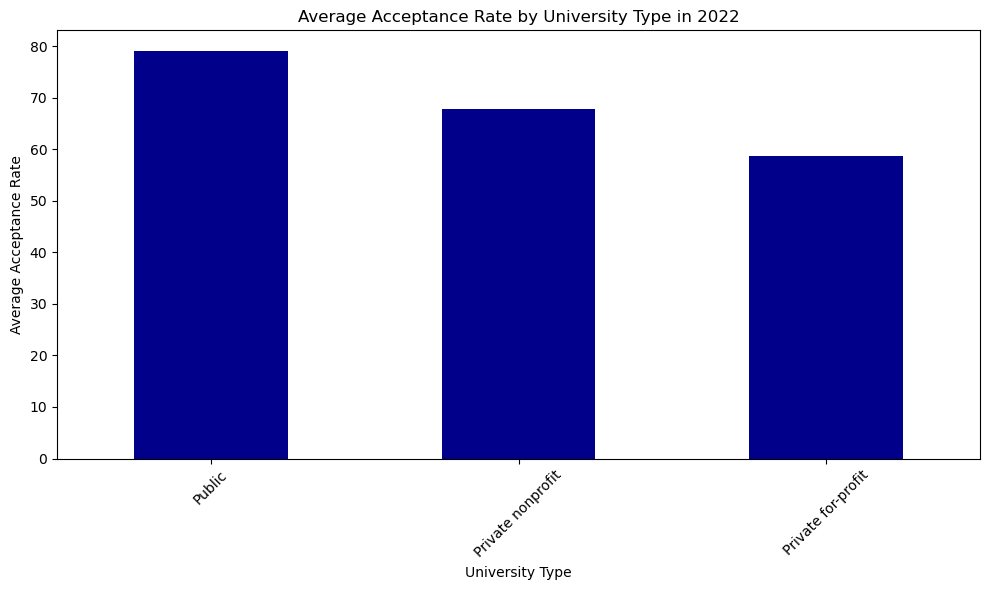

In [131]:
# Acceptance rate analysis by university type
acceptance_rate_by_type = df.groupby('University_Type')['Acceptance_Rate'].mean().sort_values(ascending=False)

# Plot the average acceptance rate by university type
plt.figure(figsize=(10, 6))
acceptance_rate_by_type.plot(kind='bar', color='darkblue')
plt.title('Average Acceptance Rate by University Type in 2022')
plt.xlabel('University Type')
plt.ylabel('Average Acceptance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [132]:
# Sort the dataset by part-time students count in descending order and select top 5 universities
top_5_part_time = df.nlargest(10, 'Part-Time_Students')

# Display the top 5 universities with the most part-time students
print(top_5_part_time[['University_Name', 'Part-Time_Students','In-State_Tuition_Fees', 'Out-of-State_Tuition_Fees']])

                                         University_Name  Part-Time_Students  \
26079                 Kent State University at Ashtabula               88.49   
20407         University of New Mexico-Los Alamos Campus               85.40   
20451    University of New Mexico-Valencia County Campus               75.47   
39460     Embry-Riddle Aeronautical University-Worldwide               75.47   
26229                              Mercy College of Ohio               74.81   
41669                   Colorado State University Global               73.82   
32185                              John A Gupton College               70.68   
20363             University of New Mexico-Gallup Campus               69.54   
24099                Cabarrus College of Health Sciences               66.89   
38679  Eastern New Mexico University Ruidoso Branch C...               65.51   

       In-State_Tuition_Fees  Out-of-State_Tuition_Fees  
26079                   6758                      15634  
204